In [1]:
#importing important libraries for preprocessing and cleaning the data and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#defining the path of the file 
path = 'C:/Users/ysanj/Desktop/projects/house-prices-advanced-regression-techniques/train.csv'

In [3]:
#loading the dataset as data and making a copy of it to work upon
data = pd.read_csv(path)
x = data.copy()
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#final features list 
feature_req = []

In [5]:
#function to plot a scatter plot 
def graph(a) :
    plt.plot(figsize=(8,6))
    plt.scatter(x[a],x['SalePrice'])
    plt.xlabel(a)
    plt.ylabel('SalePrice')
    plt.show()

In [6]:
x.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
x.shape

(1460, 81)

In [8]:
x.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

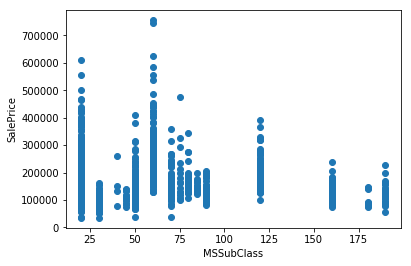

In [9]:
#ID is not affecting it in any way so it will not be our feature
#lets plot a graph to see relation between MSSubClass and SalePrice
graph('MSSubClass')

In [10]:
x['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [11]:
#we can conclude the there is no direct relation between the price and this feature 
#its just a category which has houses with variouos price range 
#hence not a feature
#lets take a look at MSZoning
x['MSZoning'].head()

0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object

In [12]:
x['MSZoning'].value_counts()
#its a categorical data 
#we can use label encoder to get a numerical idea 

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [13]:
#importing label encoder for preprocessing
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
#fitting the list into the encoder
label.fit(x['MSZoning'])
#transforming the list
new_MSZoning = label.transform(x['MSZoning'])
x['MSZoning'] = new_MSZoning
x['MSZoning'].value_counts()

3    1151
4     218
1      65
2      16
0      10
Name: MSZoning, dtype: int64

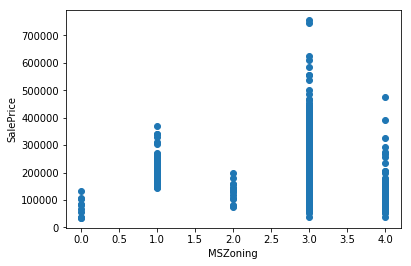

In [14]:
#lets plot them 
graph('MSZoning')

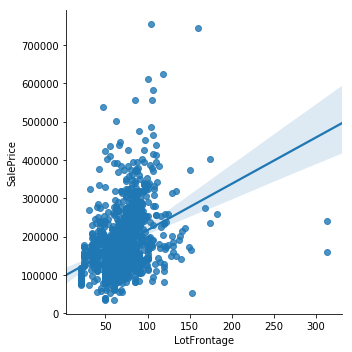

In [15]:
#it is also a categorical data
#describing where is more number of houses not the price variance
#as at 3 all price ranges of houses are present hence not a feature
#lets look at the next feature LotFrontage
x.corr()
#it has an inverse and little affect on the Saleprice
sns.lmplot('LotFrontage', 'SalePrice',data = x)


In [16]:
#as we can see most of the data is away from the
#we can conclude that it is not a good feature for Saleprice
len(x.columns)

81

In [17]:
x.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,0.632017,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,3.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,3.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,3.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
#ain contains all the numerical data
ain = x.select_dtypes(include=['float64','int64'])


#there are many columns with missing values 
#lets fill them up with mean of the data
#function to extract columns with nan values and put their names ina list "na_col"
def na_list1(data):
    l = len(data.columns)
    c = list(data.columns)
    for i in range(l):
        if sum(data[c[i]].isna()) > 0:
            data[c[i]] = data[c[i]].fillna(data[c[i]].mean())

In [19]:
na_list1(ain)

C:\Users\ysanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [20]:
x1 = ain
x1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [21]:
#lets make correlation heatmap
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(30, 30))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

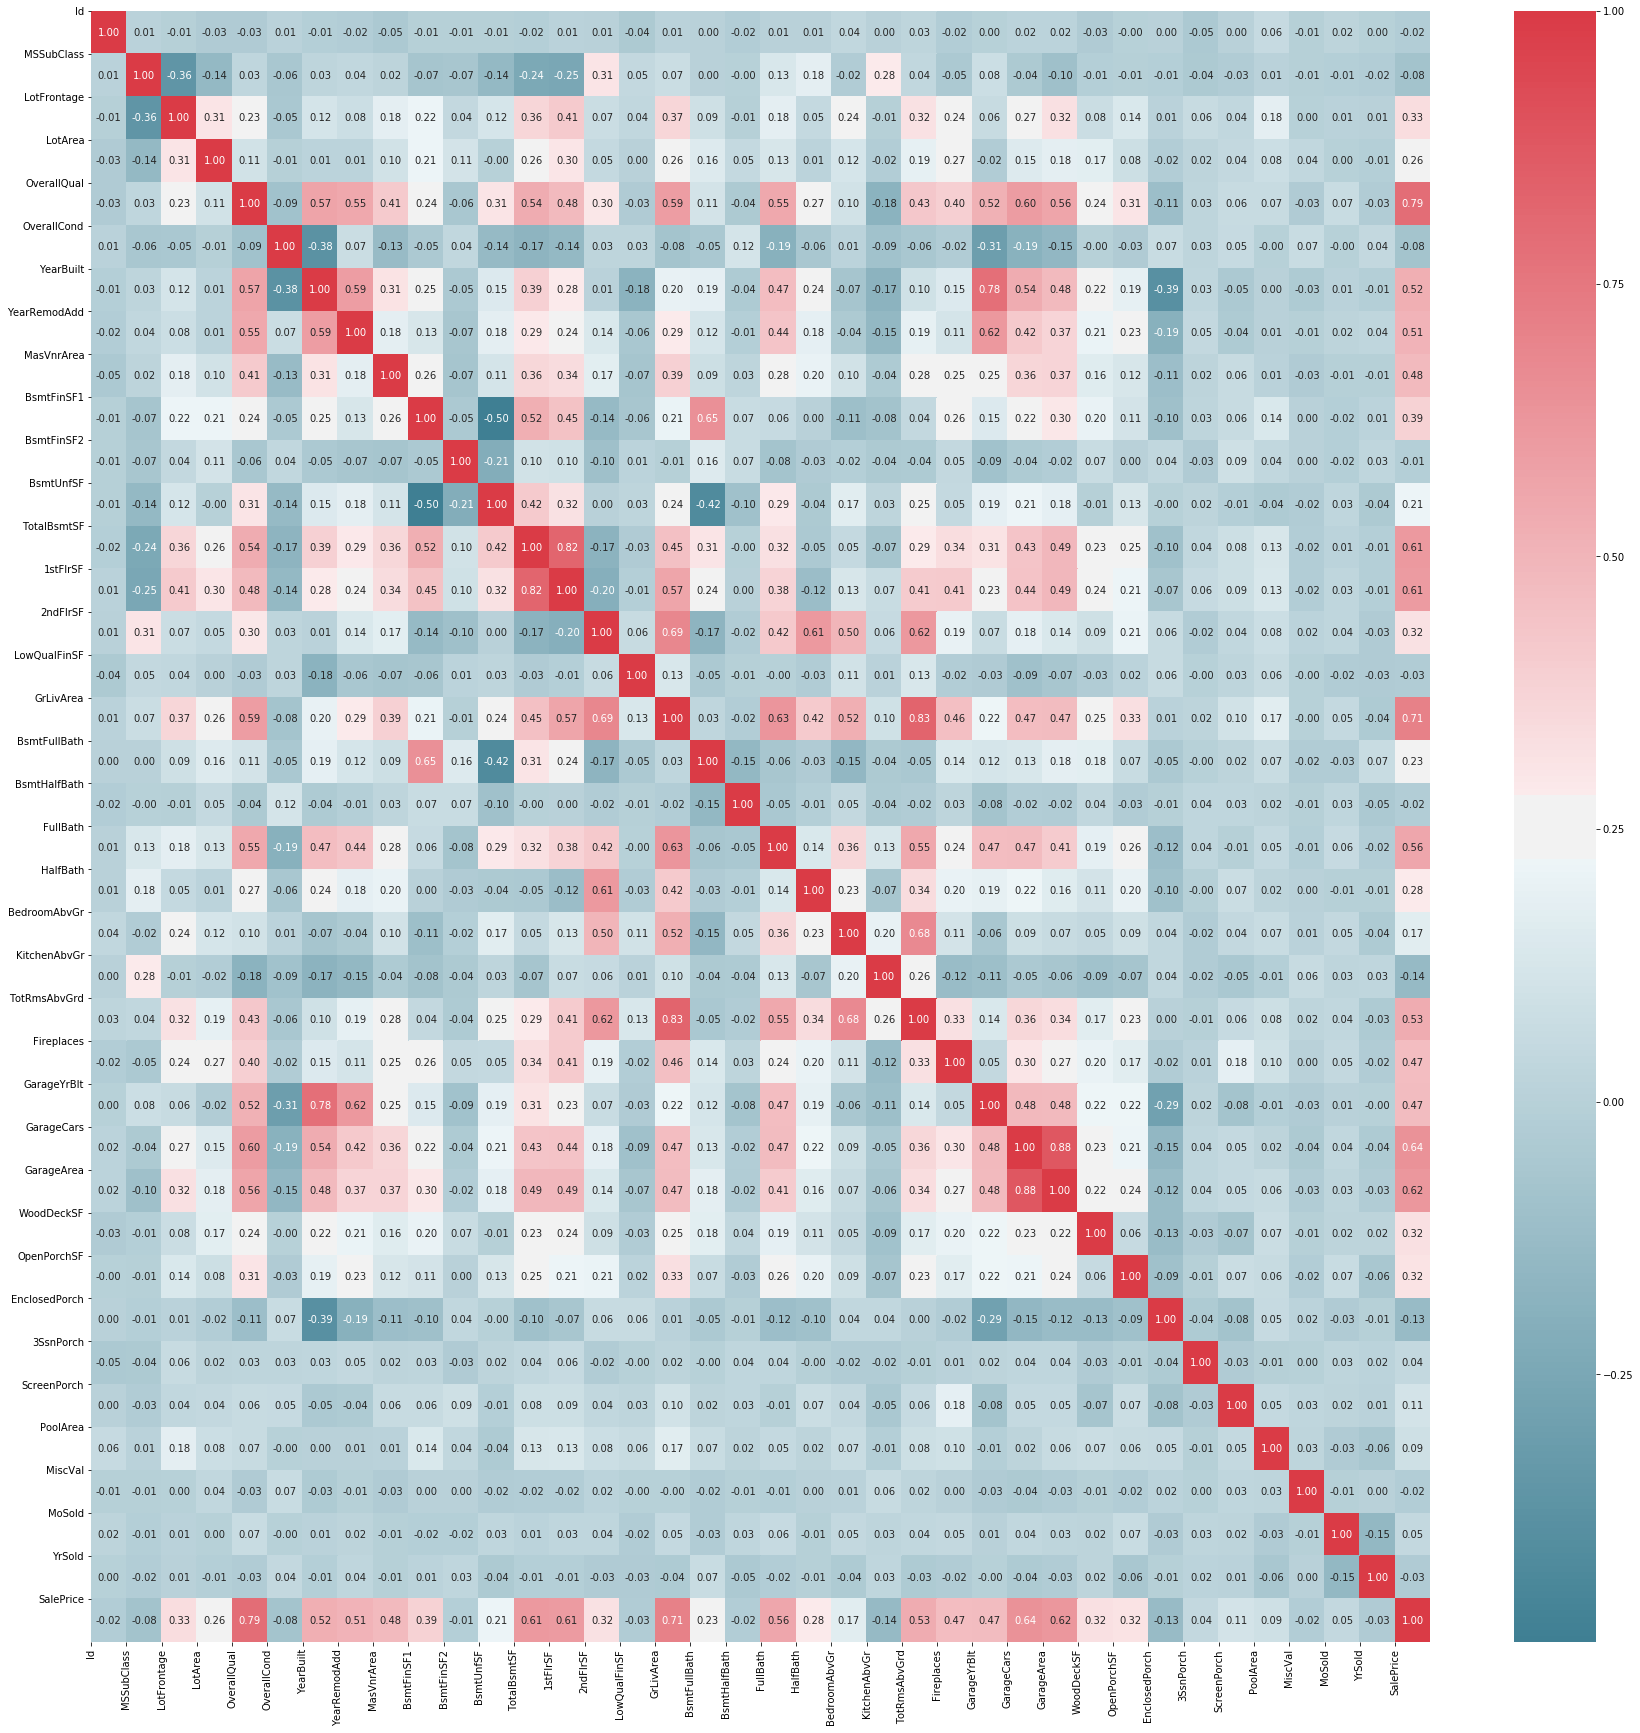

In [22]:
heatMap(x1)

In [23]:
#so out of all the numeric values we have 20 features whose correlation with the SalePrice is more then 0.25
#column to store these features
num_imp_col = ['OpenPorchSF','WoodDeckSF','GarageArea','GarageCars','GarageYrBlt','Fireplaces','TotRmsAbvGrd','FullBath','HalfBath','GrLivArea','1stFlrSF','TotalBsmtSF', '2ndFlrSF','LotArea','LotFrontage','MasVnrArea','OverallQual','YearBuilt', 'YearRemodAdd','BsmtFinSF1']
len(num_imp_col)

20

In [24]:
#adding these features to our features list
feature_req.extend(num_imp_col)
x2 = x1[num_imp_col]
x2.head()

,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,GarageYrBlt,Fireplaces,TotRmsAbvGrd,FullBath,HalfBath,GrLivArea,1stFlrSF,TotalBsmtSF,2ndFlrSF,LotArea,LotFrontage,MasVnrArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1
0,61,0,548,2,2003.0,0,8,2,1,1710,856,856,854,8450,65.0,196.0,7,2003,2003,706
1,0,298,460,2,1976.0,1,6,2,0,1262,1262,1262,0,9600,80.0,0.0,6,1976,1976,978
2,42,0,608,2,2001.0,1,6,2,1,1786,920,920,866,11250,68.0,162.0,7,2001,2002,486
3,35,0,642,3,1998.0,1,7,1,0,1717,961,756,756,9550,60.0,0.0,7,1915,1970,216
4,84,192,836,3,2000.0,1,9,2,1,2198,1145,1145,1053,14260,84.0,350.0,8,2000,2000,655


In [25]:
#lets look into the categorical data
#lets extract the object type data in obj
obj = x.select_dtypes(include= ['object'])

In [26]:
abj = list(obj.columns)
obj.describe()

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,2,2,4,4,2,5,3,25,9,8,...,6,3,5,5,3,3,4,4,9,6
top,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1454,50,925,1311,1459,1052,1382,225,1260,1445,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [27]:
#there are many columns with missing values 
#lets fill them up with "NO"
#function to extract columns with nan values and put their names ina list "na_col"
def na_list(data):
    l = len(data.columns)
    c = list(data.columns)
    for i in range(l):
        if sum(data[c[i]].isna()) > 0:
            data[c[i]] = data[c[i]].replace(np.nan,'No',regex = True)           
        

In [28]:
na_list(obj)

C:\Users\ysanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [29]:
obj.describe()
#now we have no missing values instead of that we have "NO" 
#now we can label encode them

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,2,3,4,4,2,5,3,25,9,8,...,7,4,6,6,3,4,5,5,9,6
top,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Attchd,Unf,TA,TA,Y,No,No,No,WD,Normal
freq,1454,1369,925,1311,1459,1052,1382,225,1260,1445,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [30]:
#we have categorical data here 
#lets label encode them to get a numerical interpretation
#importing label encoder for preprocessing
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [31]:
#making a function to encode all the columns of a dataframe
def encode(data):
    #columns extracting and converting it into a list
    col = list(data.columns)
    #getting the length of columns
    ran = len(col)
    for i in range(ran):
        #modification of each columns with its encoded values
        data[col[i]] = label.fit_transform(data[col[i]])

In [32]:
encode(obj)

C:\Users\ysanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [33]:
obj.head()
#now we have all the values encoded
#lets compare it with the SalePrice and see how there are related

,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,1,3,3,0,4,0,5,2,2,...,1,2,5,5,2,3,4,1,8,4
1,1,1,3,3,0,2,0,24,1,2,...,1,2,5,5,2,3,4,1,8,4
2,1,1,0,3,0,4,0,5,2,2,...,1,2,5,5,2,3,4,1,8,4
3,1,1,0,3,0,0,0,6,2,2,...,5,3,5,5,2,3,4,1,8,0
4,1,1,0,3,0,2,0,15,2,2,...,1,2,5,5,2,3,4,1,8,4


In [34]:
#making a copy of the SalePrice column from the dataframe
SalePrice_col = data['SalePrice'].copy()

In [35]:
#appending the SalePrice_col into the obj for comparison
obj['SalePrice_col'] = data['SalePrice'].copy()


C:\Users\ysanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


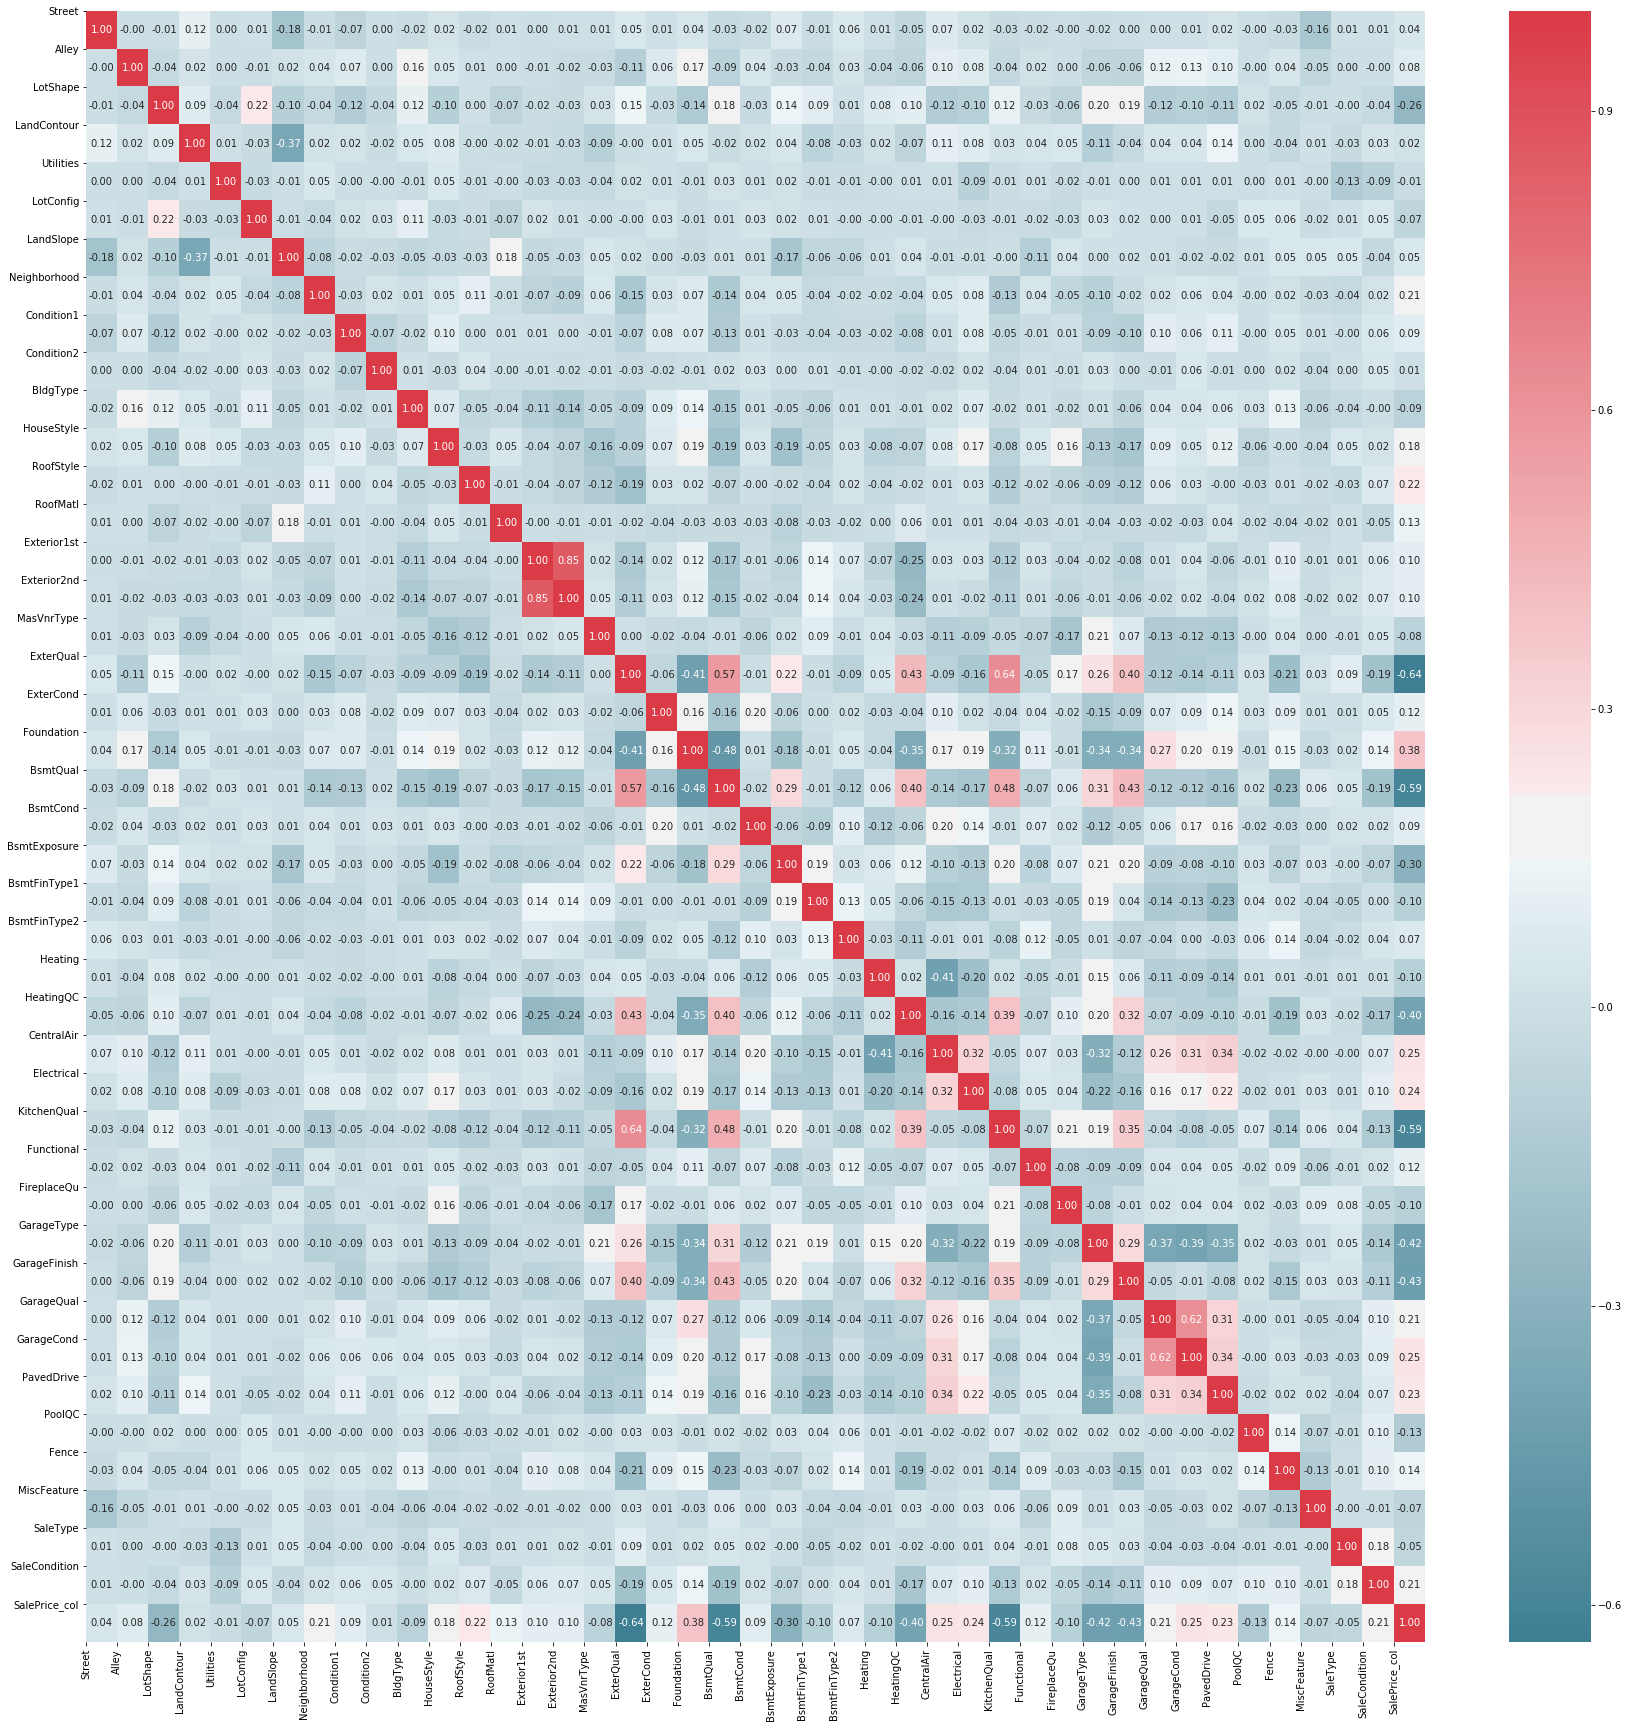

In [36]:
#lets draw an heat map to check the corr
heatMap(obj)

In [37]:
#here we have fewer features that are affecting the price of the house 
#we will for now extract columns with correlation more than 0.2 with positive or negative realtion
add_features_col = ['SaleCondition','PavedDrive','GarageType','GarageFinish','GarageQual','GarageCond','KitchenQual','Electrical',
                   'CentralAir','HeatingQC','BsmtExposure','BsmtQual','Foundation','ExterQual','RoofStyle','Neighborhood',
                   'LotShape']
len(add_features_col)
obj1 = obj[add_features_col]
obj1.head()

,SaleCondition,PavedDrive,GarageType,GarageFinish,GarageQual,GarageCond,KitchenQual,Electrical,CentralAir,HeatingQC,BsmtExposure,BsmtQual,Foundation,ExterQual,RoofStyle,Neighborhood,LotShape
0,4,2,1,2,5,5,2,5,1,0,3,2,2,2,1,5,3
1,4,2,1,2,5,5,3,5,1,0,1,2,1,3,1,24,3
2,4,2,1,2,5,5,2,5,1,0,2,2,2,2,1,5,0
3,0,2,5,3,5,5,2,5,1,2,3,4,0,3,1,6,0
4,4,2,1,2,5,5,2,5,1,0,0,2,2,2,1,15,0


In [38]:
feature_req.extend(add_features_col)
feature_req

['OpenPorchSF',
 'WoodDeckSF',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'Fireplaces',
 'TotRmsAbvGrd',
 'FullBath',
 'HalfBath',
 'GrLivArea',
 '1stFlrSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'SaleCondition',
 'PavedDrive',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'KitchenQual',
 'Electrical',
 'CentralAir',
 'HeatingQC',
 'BsmtExposure',
 'BsmtQual',
 'Foundation',
 'ExterQual',
 'RoofStyle',
 'Neighborhood',
 'LotShape']

In [39]:
#now we are done with the features for now
x2['Id'] = data['Id'].copy()
obj1['Id'] = data['Id'].copy()
#we will create a dataframe X for our training
X = x2.append(obj1,ignore_index=True)
X = x2.merge(obj1,on='Id')
X.head()
X = X[feature_req]

C:\Users\ysanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ysanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ysanj\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pa

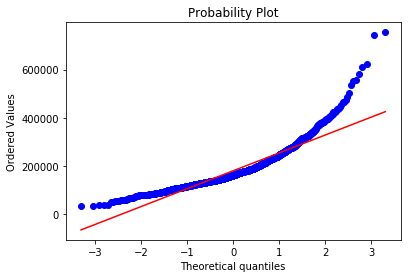

In [40]:
fig = plt.figure()
stats.probplot(data['SalePrice'],plot=plt)
plt.show()

In [41]:
#setting the label
data2 = data['SalePrice'].copy()
#to fit it to a normal distribution
Y = np.log1p(data2)

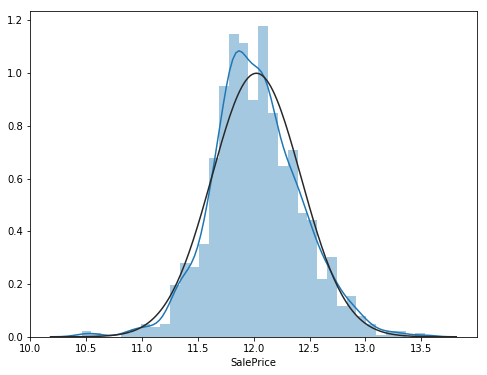

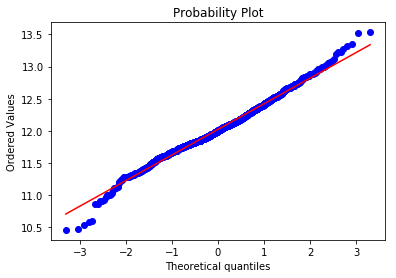

In [42]:
plt.subplots(figsize = (8,6))
sns.distplot(Y, fit = stats.norm)
fig = plt.figure()
stats.probplot(Y,plot=plt)
plt.show()
#now its in normal distribution

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
#lib for preprocessing of the data
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [53]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)

In [54]:
lr = LinearRegression()
y_pred = cross_val_predict(lr, X_train, Y_train, cv=kf)
y_pred[y_pred < 0 ] = 0

# print a result for kaggle website competition format
print('RMSLE: {0:.2f}'.format(np.sqrt(mean_squared_error(Y_train, y_pred))))

RMSLE: 0.14


In [58]:
rf = RandomForestRegressor(max_depth=8, random_state=123, n_estimators=100)
y_pred = cross_val_predict(rf, X_train, Y_train, cv=kf)
y_pred[y_pred < 0 ] = 0

# print a result for kaggle website competition
print('RMSLE: {0:.2f}'.format(np.sqrt(mean_squared_error(Y_train, y_pred))))

RMSLE: 0.15


In [59]:
#Hence regressor algorithms are better lets 

In [60]:
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [61]:
#lets use gradient boosting method to increase the accuracy

from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train,Y_train)
pred = gb.predict(X_test)
rmse(Y_test,pred)

0.1280798350214031

In [51]:
#much better now lets train it on whole data set
gb.fit(X,Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
#lets bring the test file and process os as per the requirement
#test data set
path2 = 'C:/Users/ysanj/Desktop/projects/house-prices-advanced-regression-techniques/test.csv'

In [51]:
testdata = pd.read_csv(path2)
t = testdata.copy()
#tin contains all the numerical data
tin = t.select_dtypes(include=['float64','int64'])


#there are many columns with missing values 
#lets fill them up with mean of the data
na_list1(tin)

#lets look into the categorical data
#lets extract the object type data in obj
tbj = t.select_dtypes(include= ['object'])
#handling missing values of catwgorical data 
na_list(tbj)
#ecoding the categorical values
x = encode(tbj)

C:\Users\ysanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\ysanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [85]:
#now we are done with the features for now
tin['Id'] = data['Id'].copy()
tbj['Id'] = data['Id'].copy()
#we will create a dataframe X for our training
t_df = tin.merge(tbj,on='Id')
t_df

C:\Users\ysanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ysanj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,20,80.000000,11622,5,6,1961,1961,0.0,468.0,...,1,3,4,5,2,2,2,1,9,4
1,2,20,81.000000,14267,6,6,1958,1958,108.0,923.0,...,1,3,4,5,2,2,4,0,9,4
2,3,60,74.000000,13830,5,5,1997,1998,0.0,791.0,...,1,0,4,5,2,2,2,1,9,4
3,4,60,78.000000,9978,6,6,1998,1998,20.0,602.0,...,1,0,4,5,2,2,4,1,9,4
4,5,120,43.000000,5005,8,5,1992,1992,0.0,263.0,...,1,2,4,5,2,2,4,1,9,4
5,6,60,75.000000,10000,6,5,1993,1994,0.0,0.0,...,1,0,4,5,2,2,4,1,9,4
6,7,20,68.580357,7980,6,7,1992,2007,0.0,935.0,...,1,0,4,5,2,2,0,3,9,4
7,8,60,63.000000,8402,6,5,1998,1998,0.0,0.0,...,1,0,4,5,2,2,4,1,9,4
8,9,20,85.000000,10176,7,5,1990,1990,0.0,637.0,...,1,3,4,5,2,2,4,1,9,4
9,10,20,70.000000,8400,4,5,1970,1970,0.0,804.0,...,1,0,4,5,2,2,2,1,9,4


In [86]:
t_df = t_df[feature_req]

In [87]:
t_df

,OpenPorchSF,WoodDeckSF,GarageArea,GarageCars,GarageYrBlt,Fireplaces,TotRmsAbvGrd,FullBath,HalfBath,GrLivArea,...,Electrical,CentralAir,HeatingQC,BsmtExposure,BsmtQual,Foundation,ExterQual,RoofStyle,Neighborhood,LotShape
0,0,140,730.0,1.0,1961.000000,0,5,1,0,896,...,3,1,4,3,4,1,3,1,12,3
1,36,393,312.0,1.0,1958.000000,0,6,1,1,1329,...,3,1,4,3,4,1,3,3,12,0
2,34,212,482.0,2.0,1997.000000,1,6,2,1,1629,...,3,1,2,3,2,2,3,1,8,0
3,36,360,470.0,2.0,1998.000000,1,7,2,1,1604,...,3,1,0,3,4,2,3,1,8,0
4,82,0,506.0,2.0,1992.000000,0,5,2,0,1280,...,3,1,0,3,2,2,2,1,22,0
5,84,157,440.0,2.0,1993.000000,1,7,2,1,1655,...,3,1,2,3,2,2,3,1,8,0
6,21,483,420.0,2.0,1992.000000,0,6,2,0,1187,...,3,1,0,3,2,2,3,1,8,0
7,75,0,393.0,2.0,1998.000000,1,7,2,1,1465,...,3,1,2,3,2,2,3,1,8,0
8,0,192,506.0,2.0,1990.000000,1,5,1,1,1341,...,3,1,2,1,2,2,3,1,8,3
9,0,240,525.0,2.0,1970.000000,0,4,1,0,882,...,3,1,4,3,4,1,3,1,12,3


In [88]:
#now lets use these features to predict the SalePrice
result = gb.predict(t_df)

In [95]:
#we used np.log1P to fit the target into a normal curve lets undo it to get the real prices
result = np.expm1(result)

In [99]:
my_submission = pd.DataFrame({'Id': testdata.Id, 'SalePrice':result})
my_submission.to_csv('submission.csv', index=False)


In [63]:
gb.fit(X_train,Y_train)
gb.score(X_test,Y_test)

0.8933366836669374